# Table of content:
* [Import Libraries](#1)
* [Reading the Dataset](#2)
* [Data Pre-processing](#3)
* [Modeling](#4)
    1. [K-Means](#7)
    2. [DBSCAN](#8)
    3. [MeanShift](#9)
    4. [Agglomerative Clustering](#10)
    5. [All at a glance](#11)
* [Conclusions](#5)
* [References](#6)

# Import libraries <a id = "1"></a> 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, MeanShift
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Reading the Dataset <a id = "2"></a>

<a href = 'https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python'>Link to the dataset in Kaggle.</a>
  
- CustomerID: Unique ID assigned to the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Annual Income: Annual Income of the customee
- Spending Score: Score assigned by the mall based on customer behavior and spending nature

In [2]:
customer = pd.read_csv('customer.csv')
print(f"Shape of dataset: {customer.shape}")
customer.head()

Shape of dataset: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(f"Null values:\n{customer.isnull().sum()}\n")
customer.info() 

Null values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Pre-processing <a id = "3"></a>

In [4]:
customer_new = customer.copy()

customer_new['Gender'].replace('Female', 0, inplace = True)
customer_new['Gender'].replace('Male', 1, inplace = True)

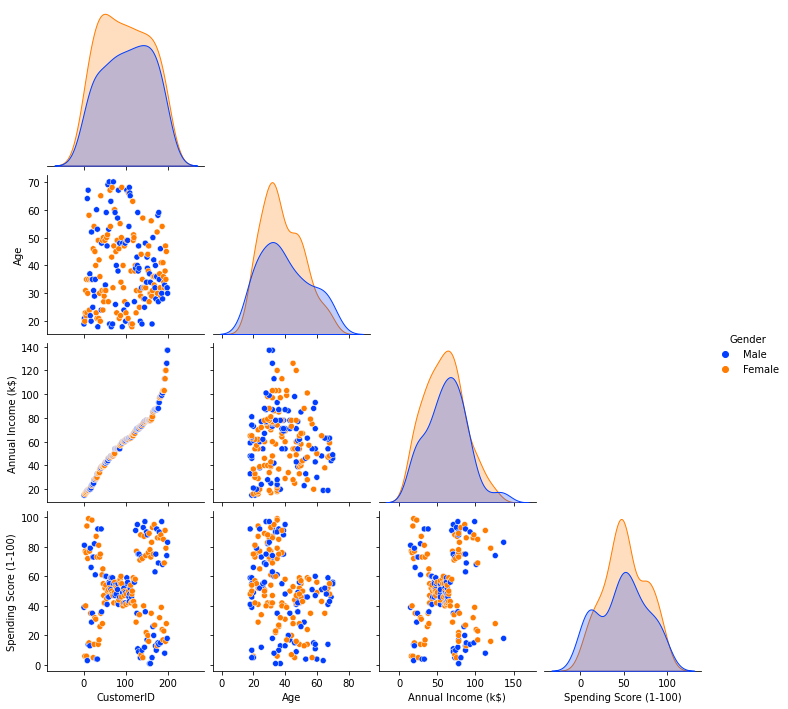

In [5]:
sns.pairplot(data = customer, hue = 'Gender', corner = True, palette = 'bright')

As shown in the plot above. There is no significant difference between male and female customers. So in the following, we try to cluster based on age, annual income, and spending score.

Text(0.5, 0, 'Age')

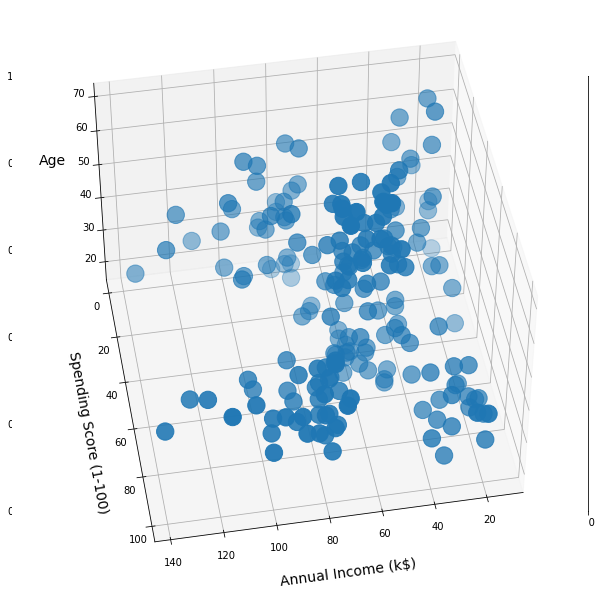

In [6]:
fig, ax = plt.subplots(figsize = (10,8))
ax = Axes3D(fig, elev = 45, azim = 80)

ax.scatter(customer_new['Annual Income (k$)'], customer_new['Spending Score (1-100)'], 
           customer_new['Age'], s = 300)

ax.set_xlabel('Annual Income (k$)', fontsize = 14, labelpad = 15)
ax.set_ylabel('Spending Score (1-100)', fontsize = 14, labelpad = 15)
ax.set_zlabel('Age', fontsize = 14, labelpad = 15)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

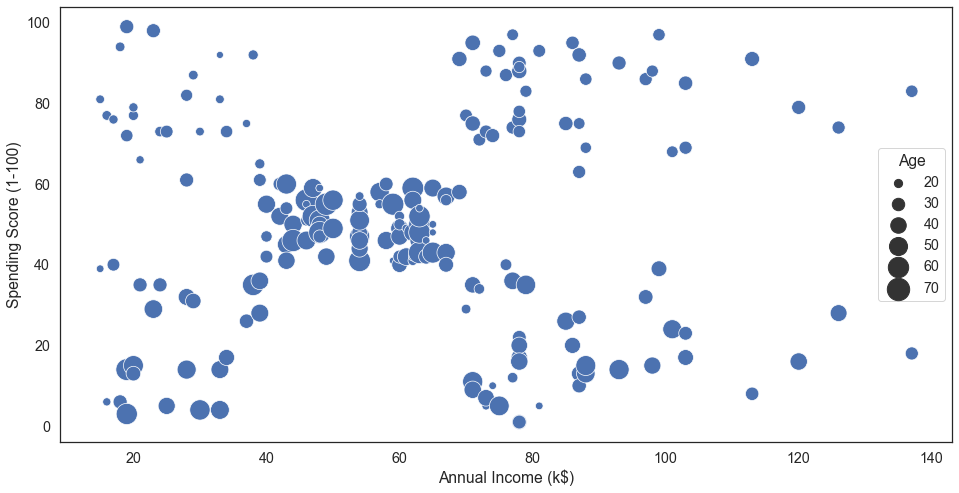

In [7]:
plt.figure(figsize = (16,8))
sns.set(style= "white", font_scale = 1.3)
sns.scatterplot(data = customer_new, 
                x = 'Annual Income (k$)', 
                y = 'Spending Score (1-100)', 
                size = 'Age', 
                sizes = (50,500)
               )

# Modeling <a id = "4"></a>

In [8]:
std_scaler = StandardScaler()
X = customer_new.values[:,2:] # 3 feature selected: age, annual income, and spending score.
X_scaled = std_scaler.fit_transform(X)

print(f"Shape of X_scaled:{X_scaled.shape}")

Shape of X_scaled:(200, 3)


#### What is Silhouette Coefficient?
"The form of the silhouette score (Rousseeuw 1987) for a single point can be seen in Figure 4. In essence, it’s a normalised difference in distance, capturing how close a point is to other points in its own cluster compared to points in the next nearest cluster."
<br></br>
<div class="verticalhorizontal">
    
<img src= "https://uploads-ssl.webflow.com/5f5148a709e16c7d368ea080/5f7dea907b8e8c7769e769c8_5f7c9650bc3b1ed0ad2247eb_silhouette_formula.jpg" 
width = "650" alt = "centered image">

</div>



### 1. K-Means <a id = "7"></a>
<br></br>
<div class="verticalhorizontal">
    
<img src= "https://chrisalbon.com/images/machine_learning_flashcards/K-Means_Clustering_print.png" 
width = "500" alt = "centered image" style = "border:2px solid black">

</div>

In [9]:
kmeans_sse = []
kmeans_silhouette = []

for k in range(2,13):
    k_means = KMeans(n_clusters = k, init = 'k-means++', n_init = 15, max_iter = 100, 
                     random_state = 1).fit(X_scaled)
    kmeans_sse.append(k_means.inertia_)
    kmeans_silhouette.append(silhouette_score(X_scaled, k_means.labels_)) 

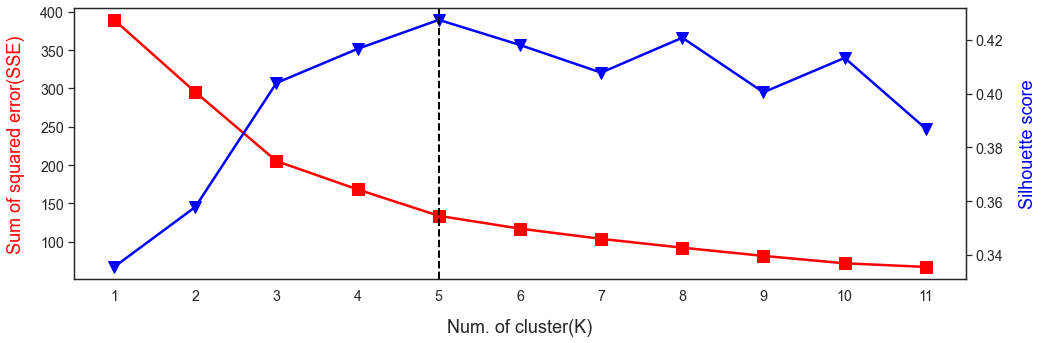

In [10]:
fig, ax1 = plt.subplots(figsize = (16,5))

ax1.plot(range(1, len(kmeans_sse) + 1), kmeans_sse, marker = 's', markersize = 12, 
         linewidth = 2.5, color = 'red')
ax1.set_xlabel("Num. of cluster(K)", fontsize = 18, labelpad = 15)
ax1.set_ylabel("Sum of squared error(SSE)", color = 'red', fontsize = 18, labelpad = 15)
ax1.grid(False)

ax2 = ax1.twinx()

ax2.plot(range(1, len(kmeans_silhouette) + 1), kmeans_silhouette, marker = 'v', markersize = 12, 
         linewidth = 2.5, color = 'blue')
ax2.set_ylabel("Silhouette score", color = 'blue', fontsize = 18, labelpad = 15)
ax2.grid(False)

ax2.axvline(x = 5, linestyle = '--', lw = 2, color = 'black')

plt.xticks(range(1, len(kmeans_silhouette) + 1))

plt.show()

#### In K-Means algorithm, K is selected equal to 5. Because:
   - In K=5, the Silhouette score has the highset score.
   - In K=5, according to the elbow method, there is an elbow.

In [11]:
k_means_5 = KMeans(n_clusters = 5, init = 'k-means++', n_init = 15, max_iter = 100,
                   random_state = 0).fit_predict(X_scaled)

customer_kmeans = customer_new.copy()
customer_kmeans['K-Means label'] = k_means_5
customer_kmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K-Means label
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2


Text(0.5, 0, 'Age')

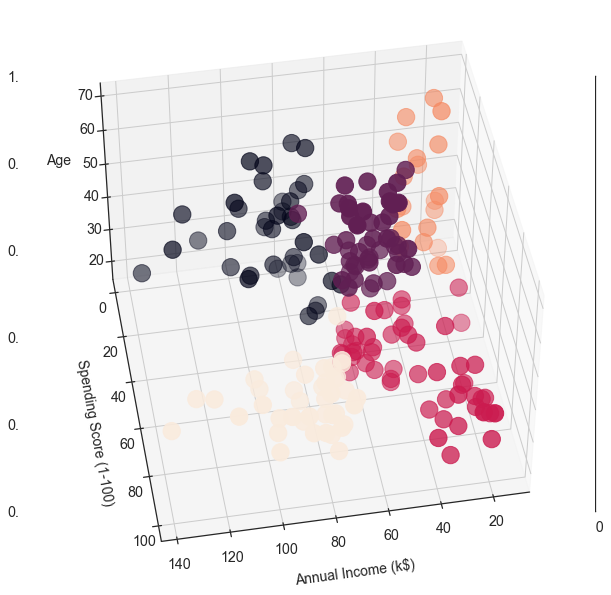

In [12]:
fig, ax = plt.subplots(figsize = (10,8))
ax = Axes3D(fig, elev = 45, azim = 80)

ax.scatter(customer_new['Annual Income (k$)'], customer_new['Spending Score (1-100)'], 
           customer_new['Age'], s = 300, c = k_means_5.astype(np.float))

ax.set_xlabel('Annual Income (k$)', fontsize = 14, labelpad = 15)
ax.set_ylabel('Spending Score (1-100)', fontsize = 14, labelpad = 15)
ax.set_zlabel('Age', fontsize = 14, labelpad = 15)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

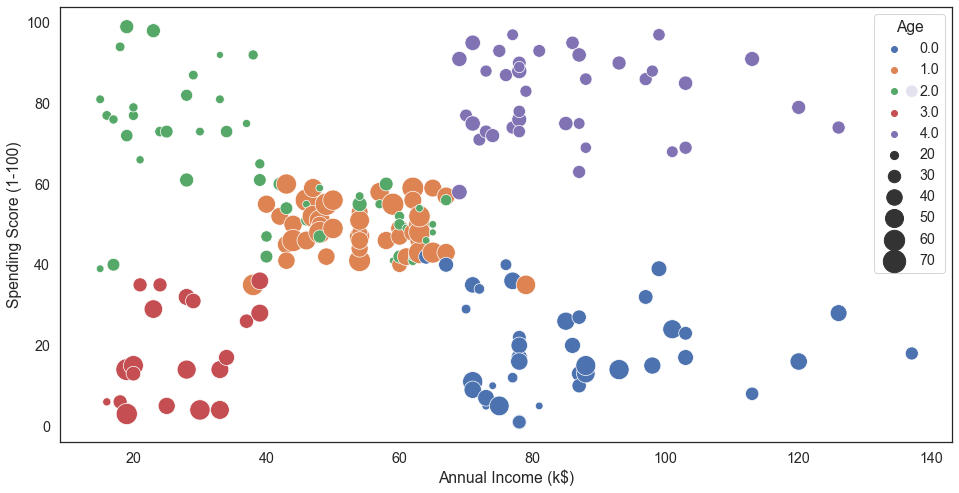

In [13]:
plt.figure(figsize = (16,8))
sns.set(style = "white", font_scale = 1.3)
sns.scatterplot(data = customer_new, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                hue = k_means_5.astype(np.float), palette = 'deep', size = 'Age', 
                sizes = (50,500))

In [14]:
print(customer_kmeans['K-Means label'].value_counts())
customer_kmeans_mean = customer_kmeans.groupby(by = 'K-Means label').mean()
customer_kmeans_mean

2    54
1    47
4    40
0    39
3    20
Name: K-Means label, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
K-Means label,,,,,
0,159.743590,0.512821,39.871795,86.102564,19.358974
1,83.872340,0.425532,55.638298,54.382979,48.851064
2,55.648148,0.407407,25.185185,41.092593,62.240741
3,24.100000,0.400000,46.250000,26.750000,18.350000
4,161.025000,0.450000,32.875000,86.100000,81.525000


### 2. DBSCAN <a id = "8"></a>
<br></br>
<div class="verticalhorizontal">

<img src= "https://chrisalbon.com/images/machine_learning_flashcards/DBSCAN_print.png" 
width= "500"  alt = "centered image" style = "border:2px solid black">

</div>

In [15]:
dbscan_silhouette = []
dbscan_ncluster = []

eps_range = np.arange(0.4, 1, 0.1)
min_sample_range = range(3, 10)

for i in eps_range:
    for j in min_sample_range:
        dbscan = DBSCAN(eps = i, min_samples = j, n_jobs = -1).fit(X_scaled)
        dbscan_silhouette.append(silhouette_score(X_scaled, dbscan.labels_)) 
        dbscan_ncluster.append(len(np.unique(dbscan.labels_)))
        
dbscan_silhouette = np.asarray(dbscan_silhouette).reshape(len(eps_range), len(min_sample_range))
dbscan_ncluster = np.asarray(dbscan_ncluster).reshape(len(eps_range), len(min_sample_range))

dbscan_silhouette_df = pd.DataFrame(dbscan_silhouette, 
                                    columns = list(min_sample_range),
                                    index = list(eps_range)
                                   )
dbscan_ncluster_df = pd.DataFrame(dbscan_ncluster, 
                                    columns = list(min_sample_range),
                                    index = list(eps_range)
                                   )

Text(0.5, 1.0, 'Number of Clusters')

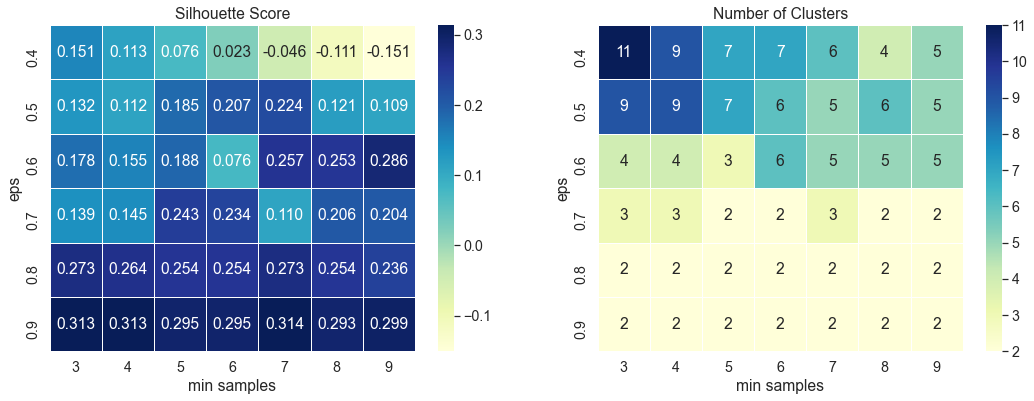

In [16]:
plt.figure(figsize = (18,6))
plt.subplot(1, 2, 1)
ax = sns.heatmap(dbscan_silhouette_df, annot = True, linewidths= .5, 
            cmap = "YlGnBu", yticklabels = dbscan_silhouette_df.index.values.round(2),
            fmt = '0.3f'
            )
ax.set_xlabel("min samples")
ax.set_ylabel('eps')
plt.title("Silhouette Score")

plt.subplot(1, 2, 2)
ax = sns.heatmap(dbscan_ncluster_df, annot = True, linewidths= .5, 
            cmap = "YlGnBu", yticklabels = dbscan_ncluster_df.index.values.round(2)
            )
ax.set_xlabel("min samples")
ax.set_ylabel('eps')
plt.title("Number of Clusters")

#### In DBSCAN algorithm, eps = 0.6 & min_samples = 7. Because:
- With this parameters, the DBSCAN algorithm has a rather high Silhouette score.
- The performance of dbscan is based on the density of points. In this dataset, the points are low density. Therefore, try not to make the eps and min samples too large.
- It should also be noted that the number of optimal clusters is more than two.

In [17]:
dbscan_5 = DBSCAN(eps = 0.6, min_samples = 7, n_jobs = -1).fit_predict(X_scaled)

customer_dbscan = customer_new.copy()
customer_dbscan['DBSCAN label'] = dbscan_5
customer_dbscan.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),DBSCAN label
0,1,1,19,15,39,-1
1,2,1,21,15,81,0
2,3,0,20,16,6,-1
3,4,0,23,16,77,0
4,5,0,31,17,40,-1


Text(0.5, 0, 'Age')

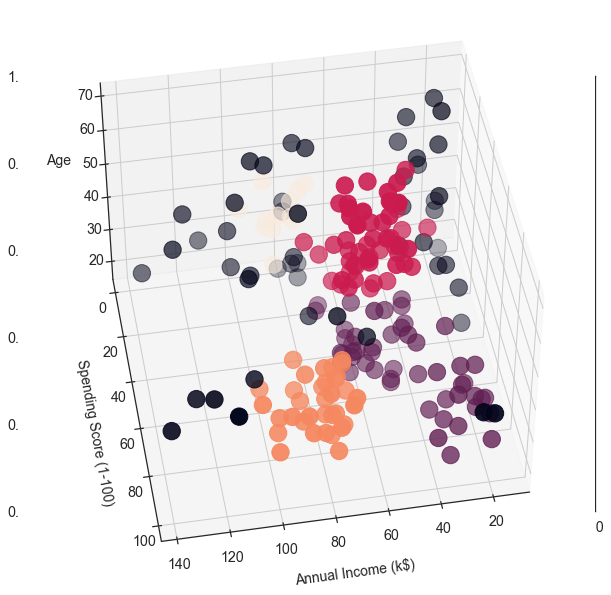

In [18]:
fig, ax = plt.subplots(figsize = (10,8))
ax = Axes3D(fig, elev = 45, azim = 80)

ax.scatter(customer_new['Annual Income (k$)'], customer_new['Spending Score (1-100)'], 
           customer_new['Age'], s = 300, c = dbscan_5.astype(np.float))

ax.set_xlabel('Annual Income (k$)', fontsize = 14, labelpad = 15)
ax.set_ylabel('Spending Score (1-100)', fontsize = 14, labelpad = 15)
ax.set_zlabel('Age', fontsize = 14, labelpad = 15)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

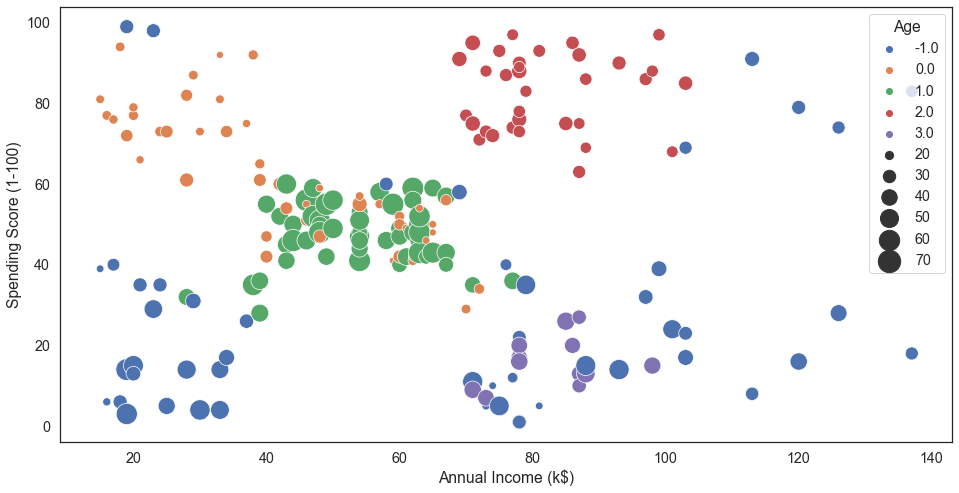

In [19]:
plt.figure(figsize = (16,8))
sns.set(style = "white", font_scale = 1.3)
sns.scatterplot(data = customer_dbscan, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                hue = dbscan_5.astype(np.float), palette = 'deep', size = 'Age', 
                sizes = (50,500))

In [20]:
print(customer_dbscan['DBSCAN label'].value_counts())
customer_dbscan_mean = customer_dbscan.groupby(by = 'DBSCAN label').mean()
customer_dbscan_mean

 1    53
 0    51
-1    50
 2    34
 3    12
Name: DBSCAN label, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
DBSCAN label,,,,,
-1,105.820000,0.420000,40.260000,64.980000,28.840000
0,61.490196,0.411765,24.588235,43.705882,60.549020
1,83.113208,0.433962,54.113208,54.000000,47.358491
2,157.000000,0.470588,32.588235,81.647059,82.558824
3,160.833333,0.583333,43.916667,83.000000,16.083333


#### Based on the DBSCAN algorithm, 4 clusteres were identified (and 50 outliers!):
- It turned out that this algorithm did not perform well in clustering. This could have been predicted before writing the code. Few samples were available and the relative density was low.

### 3. Meanshift Clustering <a id = "9"></a>
<br></br>
<div class="verticalhorizontal">
    
<img src= "https://chrisalbon.com/images/machine_learning_flashcards/Meanshift_Clustering_By_Analogy_print.png" 
width= "500"  alt = "centered image" style = "border:2px solid black">

</div>

In [21]:
mshift_silhouette = []
mshift_ncluster = []

bandwidth_range = np.arange(0.9, 1.4, 0.1)

for i in bandwidth_range:

    mshift = MeanShift(bandwidth = i, n_jobs = -1).fit(X_scaled)
    mshift_silhouette.append(silhouette_score(X_scaled, mshift.labels_)) 
    mshift_ncluster.append(len(np.unique(mshift.labels_)))   

mshift_silhouette = np.asarray(mshift_silhouette).reshape(len(mshift_silhouette), 1) 
mshift_ncluster = np.asarray(mshift_ncluster).reshape(len(mshift_ncluster), 1) 

Text(0.5, 1.0, 'Number of Clusters')

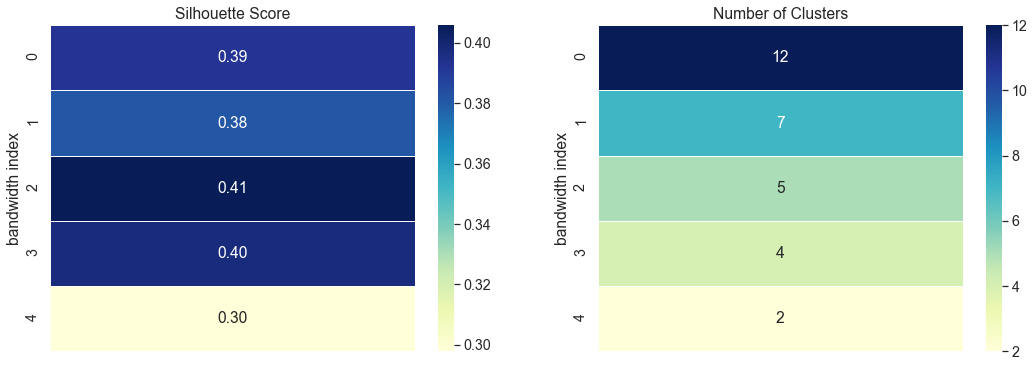

In [22]:
plt.figure(figsize = (18,6))

plt.subplot(1, 2, 1)
ax = sns.heatmap(mshift_silhouette, annot = True, linewidths= .5,
                 cmap = "YlGnBu",
                 fmt = '0.2f'
                 )
ax.set(xticklabels=[])
ax.set_ylabel("bandwidth index")
plt.title("Silhouette Score")

plt.subplot(1, 2, 2)
ax = sns.heatmap(mshift_ncluster, annot = True, linewidths= .5, 
                 cmap = "YlGnBu"
                 )
ax.set(xticklabels=[])
ax.set_ylabel("bandwidth index")
plt.title("Number of Clusters")

#### In Meanshift algorithm, bandwidth is selected equal to 1.1. Because:
- In bandwidth=1.1, the Silhouette score has the highset score.

In [23]:
mshift_5 = MeanShift(bandwidth = 1.1, n_jobs = -1).fit_predict(X_scaled)

customer_mshift = customer_new.copy()
customer_mshift['MeanShift label'] = mshift_5
customer_mshift.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),MeanShift label
0,1,1,19,15,39,4
1,2,1,21,15,81,4
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,4


Text(0.5, 0, 'Age')

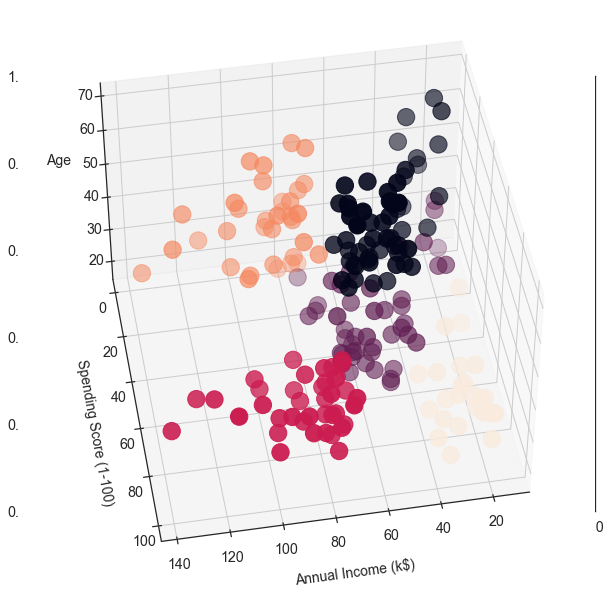

In [24]:
fig, ax = plt.subplots(figsize = (10,8))
ax = Axes3D(fig, elev = 45, azim = 80)

ax.scatter(customer_new['Annual Income (k$)'], customer_new['Spending Score (1-100)'], 
           customer_new['Age'], s = 300, c = mshift_5.astype(np.float))

ax.set_xlabel('Annual Income (k$)', fontsize = 14, labelpad = 15)
ax.set_ylabel('Spending Score (1-100)', fontsize = 14, labelpad = 15)
ax.set_zlabel('Age', fontsize = 14, labelpad = 15)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

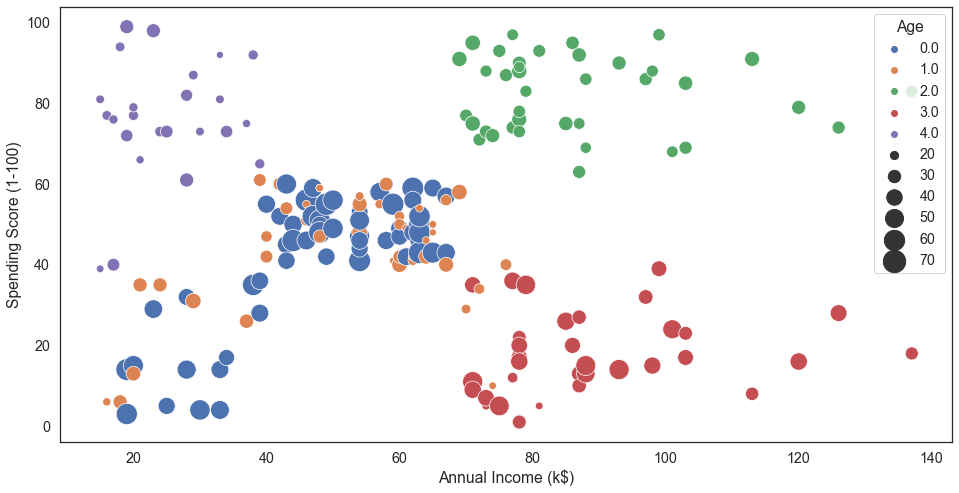

In [25]:
plt.figure(figsize = (16,8))
sns.set(style = "white", font_scale = 1.3)
sns.scatterplot(data = customer_mshift, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                hue = mshift_5.astype(np.float), palette = 'deep', size = 'Age', 
                sizes = (50,500))

In [26]:
print(customer_mshift['MeanShift label'].value_counts())
customer_mshift_mean = customer_mshift.groupby(by = 'MeanShift label').mean()
customer_mshift_mean

0    57
1    46
2    39
3    34
4    24
Name: MeanShift label, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
MeanShift label,,,,,
0,69.473684,0.438596,55.543860,47.947368,41.894737
1,80.260870,0.347826,27.891304,52.000000,44.108696
2,162.000000,0.461538,32.692308,86.538462,82.128205
3,165.176471,0.558824,42.352941,88.647059,17.500000
4,21.416667,0.416667,25.250000,24.916667,76.041667


### 4. Agglomerative Clustering <a id = "10"></a>
<br></br>
<div class="verticalhorizontal">
    
<img src= "https://chrisalbon.com/images/machine_learning_flashcards/Aggomerative_Clustering_print.png" 
width= "500"  alt = "centered image" style = "border:2px solid black">

</div>

In [27]:
agg_5 = AgglomerativeClustering(n_clusters = 5, linkage = 'average').fit_predict(X_scaled)

customer_agg = customer_new.copy()
customer_agg['Agg label'] = agg_5
customer_agg.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Agg label
0,1,1,19,15,39,2
1,2,1,21,15,81,1
2,3,0,20,16,6,2
3,4,0,23,16,77,1
4,5,0,31,17,40,2


Text(0.5, 0, 'Age')

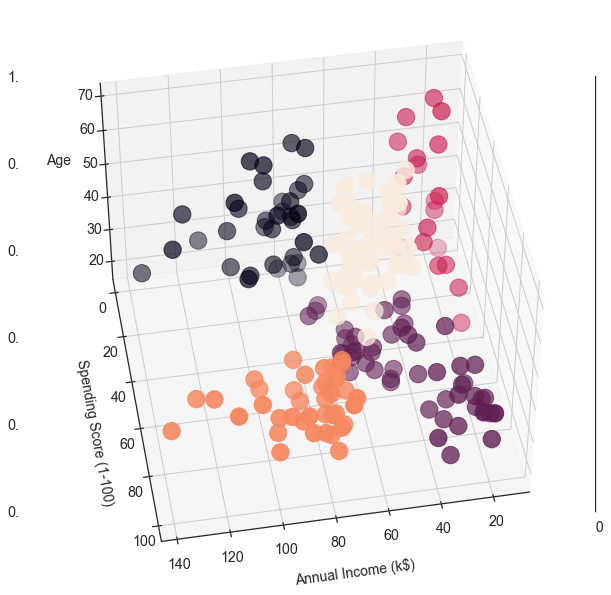

In [28]:
fig, ax = plt.subplots(figsize = (10,8))
ax = Axes3D(fig, elev = 45, azim = 80)

ax.scatter(customer_agg['Annual Income (k$)'], customer_agg['Spending Score (1-100)'], 
           customer_agg['Age'], s = 300, c = agg_5.astype(np.float))

ax.set_xlabel('Annual Income (k$)', fontsize = 14, labelpad = 15)
ax.set_ylabel('Spending Score (1-100)', fontsize = 14, labelpad = 15)
ax.set_zlabel('Age', fontsize = 14, labelpad = 15)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

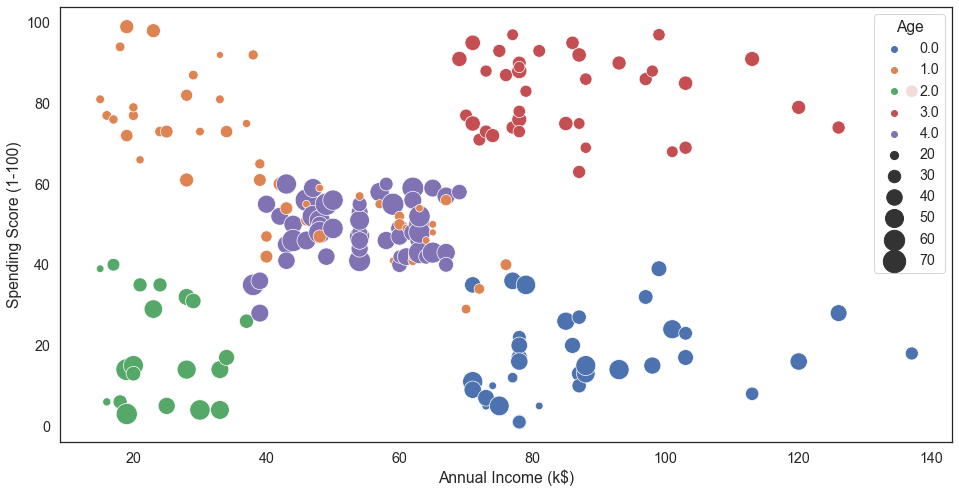

In [29]:
plt.figure(figsize = (16,8))
sns.set(style = "white", font_scale = 1.3)
sns.scatterplot(data = customer_agg, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                hue = agg_5.astype(np.float), palette = 'deep', size = 'Age', 
                sizes = (50,500))

In [30]:
print(customer_agg['Agg label'].value_counts())
customer_agg_mean = customer_agg.groupby(by = 'Agg label').mean()
customer_agg_mean.head()

4    54
1    52
3    39
0    35
2    20
Name: Agg label, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Agg label,,,,,
0,164.428571,0.571429,41.685714,88.228571,17.285714
1,60.269231,0.384615,24.653846,42.942308,62.076923
2,20.000000,0.400000,43.900000,24.450000,19.100000
3,162.000000,0.461538,32.692308,86.538462,82.128205
4,83.203704,0.407407,53.259259,54.203704,48.555556


#### Based on the Agglomerative clustering algorithm, 5 clusteres were identified:
- This algorithm offers no special advantage over K-Means, nor does it have a better method of determining the number of clusters than K-Means.

### 5. All at a glance <a id = "11"></a>

In [31]:
kmeans_sil_score = silhouette_score(X_scaled, k_means_5)
dbscan_sil_score = silhouette_score(X_scaled, dbscan_5)
mshift_sil_score = silhouette_score(X_scaled, mshift_5)
agg_sil_score = silhouette_score(X_scaled, agg_5)

df_sil_score = pd.DataFrame({'Silhouette Score': [kmeans_sil_score, 
                                                  dbscan_sil_score, 
                                                  mshift_sil_score, 
                                                  agg_sil_score]},
                            index = ['K-Means','DBSCAN','MeanShift','Agglomerative'])

df_sil_score['Silhouette Score'] = df_sil_score['Silhouette Score'].round(decimals = 3)
df_sil_score

,Silhouette Score
K-Means,0.417
DBSCAN,0.257
MeanShift,0.406
Agglomerative,0.410


[Text(0, 0, '0.417'),
 Text(0, 0, '0.257'),
 Text(0, 0, '0.406'),
 Text(0, 0, '0.41')]

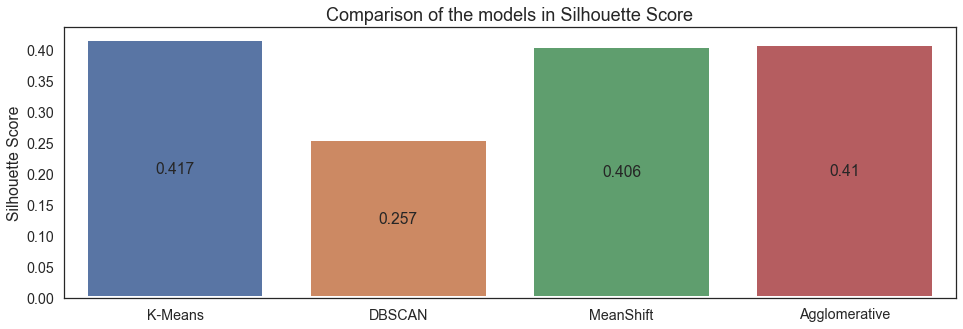

In [32]:
plt.figure(figsize = (16, 5))
sns.set_style('white')
 
plt.gca().set_title('Comparison of the models in Silhouette Score', fontsize = 18)

ax = sns.barplot(data = df_sil_score, x = df_sil_score.index,
                 y = df_sil_score['Silhouette Score'], linewidth = 4)

ax.bar_label(ax.containers[0], label_type = 'center')

# Conclusions <a id = "5"></a>

Based on the Silhouette Score, the K-Means model had the best performance. In addition, in the K-Means algorithm, it is much easier to find the number of clusters.

<Figure size 1152x1152 with 0 Axes>

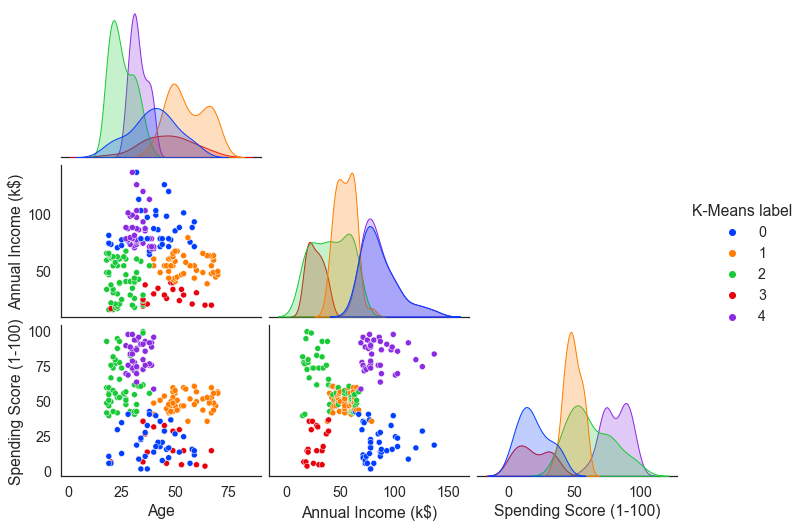

In [33]:
plt.figure(figsize = (16,16))
sns.pairplot(data = customer_kmeans, 
             vars = ['Age','Annual Income (k$)', 'Spending Score (1-100)'], 
             hue = 'K-Means label', 
             corner = True, 
             palette = 'bright',
             aspect = 1.3)

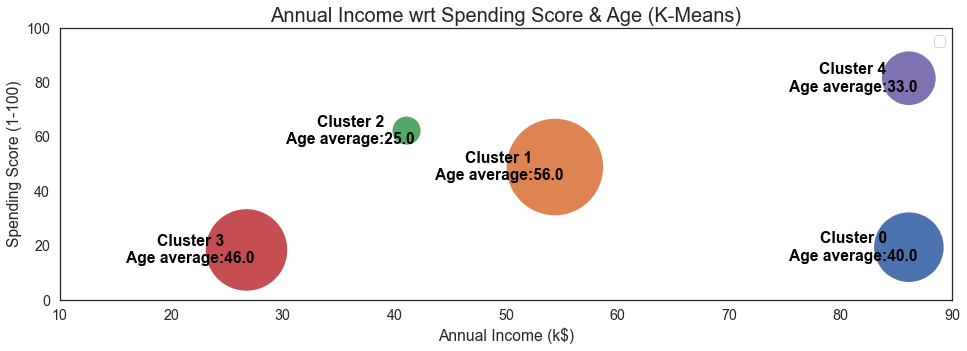

In [34]:
plt.figure(figsize = (16,5))
sns.set(style = "white", font_scale = 1.3)

for i in list(range(0,5)):
        plt.text(customer_kmeans_mean['Annual Income (k$)'][i]-5, 
                 customer_kmeans_mean['Spending Score (1-100)'][i],
                 s = "Cluster " + str(i) + "\nAge average:" + str(round(customer_kmeans_mean['Age'][i],0)) ,
                 color='black',
                 weight='semibold',
                 horizontalalignment = 'center',
                 verticalalignment = 'center'
                )

sns.scatterplot(data = customer_kmeans_mean,
                x = 'Annual Income (k$)',
                y = 'Spending Score (1-100)',
                hue = customer_kmeans_mean.index,
                palette = 'deep',
                size = 'Age',
                sizes = (1000,10000)
                )

plt.title("Annual Income wrt Spending Score & Age (K-Means)", size = 20)
plt.xlim(10, 90)
plt.ylim(0, 100)
plt.legend([])

#### Based on the K-Means algorithm, 5 clusteres were identified:
- Label 0: People with **high** annual incomes but **low** spending scores.
- Label 1: **Older** people with **average** annual incomes and **average** spending scores.
- Label 2: **Young** people with **low** annual incomes but **high** spending scores.
- Label 3: **Middle-aged** people with **low** annual incomes and **low** spending scores.
- Label 4: **Young** people with **high** annual incomes but **high** spending scores.

# References <a id = "6"></a>

- https://chrisalbon.com/
- <a href = 'https://www.platform.ai/post/the-silhouette-loss-function-metric-learning-with-a-cluster-validity-index'>The Silhouette Loss Function: Metric Learning with a Cluster Validity Index</a>
